In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [3]:
from qiskit.quantum_info import entropy, DensityMatrix

In [4]:
%run init-qiskit.ipynb

C:\Users\stark\AppData\Local\Temp\ipykernel_24728\1918398002.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
ibmqfactory.load_account:WARNING:2023-06-14 18:42:55,413: Credentials are already in use. The existing account in the session will be replaced.


ibm_perth                    ibm_nairobi                  ibm_lagos
---------                    -----------                  ---------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 215            Pending Jobs: 92             Pending Jobs: 213
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      174.8          Avg. T1:      101.6          Avg. T1:      124.3
Avg. T2:      121.9          Avg. T2:      57.9           Avg. T2:      62.4



ibmq_manila                  ibmq_jakarta                 ibmq_quito
-----------                  ------------                 ----------
Num. Qubits:  5              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 66             Pending Jobs: 123            Pending Jobs: 28
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operati

In [5]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [6]:
%run init-qiskit_optical_elements.ipynb

In [7]:
device = provider.get_backend('ibm_nairobi')

# Irrealidade dos átomos $WZ$ fora do IMZ

## BBO$_{p}$ - Fora do IMZ - QWP$_{out}$

In [8]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
rhoWZ_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
rhoWZ_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
Phi_WZ_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
Irr_WZ_out                = np.zeros(th.shape[0], dtype=object)
jobs_ids_WZ_out = []

<img src = 'setup_realism.jpg' width = '90%'>

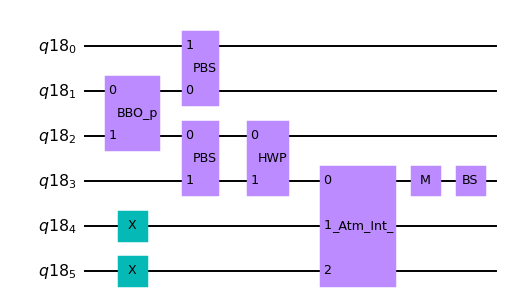

In [9]:
def qc_QCRWZ_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                          # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_out_ = qc_QCRWZ_out(math.pi); qc_QCRWZ_out_.draw(output = 'mpl', scale = 0.7)

In [10]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=9
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-03 - 17:05:23

--------------------------------------

j =  9  - theta = 1.419216694115407
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-03 - 17:36:02
chtpq39vrup8981n7kkg
k =  0

k =  1
Job Status: job has successfully run
2023-06-03 - 17:46:42
chtq8e391dmpcngslusg
k =  1

k =  2
Job Status: job has successfully run
2023-06-03 - 18:01:07
chtqddr91dmpcngsq9l0
k =  2

k =  3
Job Status: job has successfully run
2023-06-03 - 18:12:25
chtqk63gsimdkulu2mu0
k =  3

k =  4
Job Status: job has successfully run
2023-06-03 - 18:22:34
chtqpfhoq2qn3r26lsj0
k =  4

k =  5
Job Status: job has successfully run
2023-06-05 - 00:50:53
chtqu88recnk2p4pl870
k =  5

k =  6
Job Status: job has successfully run
2023-06-05 - 00:59:52
chuln91vrup8982gb5s0
k =  6

k =  7
Job Status: job has successfully run
2023-06-05 - 01:09:39
chulrfbgsimdkumlu5hg
k =  7

k =  8
Job Status: job has successfully run
2023-06-05 - 01:20:51
chum02ai3durlgrq7ubg
k

In [11]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 116745.67 segundos
Tempo de execução: 1945.76 minutos
Tempo de execução: 32.43 horas


In [12]:
x

['chtpq39vrup8981n7kkg',
 'chtq8e391dmpcngslusg',
 'chtqddr91dmpcngsq9l0',
 'chtqk63gsimdkulu2mu0',
 'chtqpfhoq2qn3r26lsj0',
 'chtqu88recnk2p4pl870',
 'chuln91vrup8982gb5s0',
 'chulrfbgsimdkumlu5hg',
 'chum02ai3durlgrq7ubg',
 'chum5a9oq2qn3r2ul90g']

In [13]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g']]

In [14]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=8
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-05 - 07:19:40

--------------------------------------

j =  8  - theta = 1.2626370614359173
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-05 - 07:27:15
churdgr91dmpcnhp6se0
k =  0

k =  1
Job Status: job has successfully run
2023-06-05 - 07:35:31
churh2orecnk2p5lvll0
k =  1

k =  2
Job Status: job has successfully run
2023-06-05 - 07:43:55
churkupvrup8982lc7n0
k =  2

k =  3
Job Status: job has successfully run
2023-06-05 - 07:51:56
churoshoq2qn3r339qn0
k =  3

k =  4
Job Status: job has successfully run
2023-06-05 - 08:13:41
churskhoq2qn3r33cr50
k =  4

k =  5
Job Status: job has successfully run
2023-06-05 - 08:30:00
chus6r8recnk2p5mhf1g
k =  5

k =  6
Job Status: job has successfully run
2023-06-05 - 08:38:00
chusem3gsimdkumrbik0
k =  6

k =  7
Job Status: job has successfully run
2023-06-05 - 08:46:07
chusi88recnk2p5mq1mg
k =  7

k =  8
Job Status: job has successfully run
2023-06-05 - 09:24:15
chusm1b91dmpcnhq6lag


In [15]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 7997.78 segundos
Tempo de execução: 133.3 minutos
Tempo de execução: 2.22 horas


In [16]:
x

['churdgr91dmpcnhp6se0',
 'churh2orecnk2p5lvll0',
 'churkupvrup8982lc7n0',
 'churoshoq2qn3r339qn0',
 'churskhoq2qn3r33cr50',
 'chus6r8recnk2p5mhf1g',
 'chusem3gsimdkumrbik0',
 'chusi88recnk2p5mq1mg',
 'chusm1b91dmpcnhq6lag',
 'chut7tjgsimdkumrta50']

In [17]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g'],
 ['churdgr91dmpcnhp6se0',
  'churh2orecnk2p5lvll0',
  'churkupvrup8982lc7n0',
  'churoshoq2qn3r339qn0',
  'churskhoq2qn3r33cr50',
  'chus6r8recnk2p5mhf1g',
  'chusem3gsimdkumrbik0',
  'chusi88recnk2p5mq1mg',
  'chusm1b91dmpcnhq6lag',
  'chut7tjgsimdkumrta50']]

In [18]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=7
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-05 - 09:33:00

--------------------------------------

j =  7  - theta = 1.1060574287564275
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-05 - 09:40:55
chutc00recnk2p5ncfm0
k =  0

k =  1
Job Status: job has successfully run
2023-06-05 - 09:48:33
chutfq0recnk2p5nfapg
k =  1

k =  2
Job Status: job has successfully run
2023-06-05 - 09:57:04
chutjdqi3durlgs06ur0
k =  2

k =  3
Job Status: job has successfully run
2023-06-05 - 10:14:13
chutnab91dmpcnhqupj0
k =  3

k =  4
Job Status: job has successfully run
2023-06-05 - 10:32:33
chutvb8recnk2p5nsmeg
k =  4

k =  5
Job Status: job has successfully run
2023-06-05 - 10:41:29
chuu7trgsimdkumsnsq0
k =  5

k =  6
Job Status: job has successfully run
2023-06-05 - 10:49:09
chuuc41vrup8982nkjtg
k =  6

k =  7
Job Status: job has successfully run
2023-06-05 - 19:00:20
chuufn9oq2qn3r35da6g
k =  7

k =  8
Job Status: job has successfully run
2023-06-06 - 02:25:47
chv5luunfq8rvo0jfsu0


In [19]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 88129.22 segundos
Tempo de execução: 1468.82 minutos
Tempo de execução: 24.48 horas


In [20]:
x

['chutc00recnk2p5ncfm0',
 'chutfq0recnk2p5nfapg',
 'chutjdqi3durlgs06ur0',
 'chutnab91dmpcnhqupj0',
 'chutvb8recnk2p5nsmeg',
 'chuu7trgsimdkumsnsq0',
 'chuuc41vrup8982nkjtg',
 'chuufn9oq2qn3r35da6g',
 'chv5luunfq8rvo0jfsu0',
 'chvc6om561q7nmcm6vmg']

In [21]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g'],
 ['churdgr91dmpcnhp6se0',
  'churh2orecnk2p5lvll0',
  'churkupvrup8982lc7n0',
  'churoshoq2qn3r339qn0',
  'churskhoq2qn3r33cr50',
  'chus6r8recnk2p5mhf1g',
  'chusem3gsimdkumrbik0',
  'chusi88recnk2p5mq1mg',
  'chusm1b91dmpcnhq6lag',
  'chut7tjgsimdkumrta50'],
 ['chutc00recnk2p5ncfm0',
  'chutfq0recnk2p5nfapg',
  'chutjdqi3durlgs06ur0',
  'chutnab91dmpcnhqupj0',
  'chutvb8recnk2p5nsmeg',
  'chuu7trgsimdkumsnsq0',
  'chuuc41vrup8982nkjtg',
  'chuufn9oq2qn3r35da6g',
  'chv5luunfq8rvo0jfsu0',
  'chvc6om561q7nmcm6vmg']]

In [22]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=6
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-06 - 10:01:51

--------------------------------------

j =  6  - theta = 0.9494777960769379
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-06 - 17:18:27
chvish0pd9tm50s4jrgg
k =  0

k =  1
Job Status: job has successfully run
2023-06-07 - 06:45:27
chvp97alnlj7ii801qv0
k =  1

k =  2
Job Status: job has successfully run
2023-06-07 - 07:49:40
ci053f9cinbchsnqulc0
k =  2

k =  3
Job Status: job has successfully run
2023-06-07 - 08:58:31
ci061ih3lqnvrkvba0dg
k =  3

k =  4
Job Status: job has successfully run
2023-06-07 - 09:29:07
ci071rh3lqnvrkvc4l0g
k =  4

k =  5
Job Status: job has successfully run
2023-06-07 - 13:41:05
ci07g5ukcccjrh7qrbv0
k =  5

k =  6
Job Status: job has successfully run
2023-06-07 - 17:56:19
ci0b69p3lqnvrkvi7880
k =  6

k =  7
Job Status: job has successfully run
2023-06-08 - 03:23:04
ci0etue1o26hu31cc010
k =  7

k =  8
Job Status: job has successfully run
2023-06-08 - 11:40:11
ci0n7k93lqnvrkvu4tr0


In [23]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 196722.04 segundos
Tempo de execução: 3278.7 minutos
Tempo de execução: 54.65 horas


In [24]:
x

['chvish0pd9tm50s4jrgg',
 'chvp97alnlj7ii801qv0',
 'ci053f9cinbchsnqulc0',
 'ci061ih3lqnvrkvba0dg',
 'ci071rh3lqnvrkvc4l0g',
 'ci07g5ukcccjrh7qrbv0',
 'ci0b69p3lqnvrkvi7880',
 'ci0etue1o26hu31cc010',
 'ci0n7k93lqnvrkvu4tr0',
 'ci0ugk93lqnvrko7ua50']

In [25]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g'],
 ['churdgr91dmpcnhp6se0',
  'churh2orecnk2p5lvll0',
  'churkupvrup8982lc7n0',
  'churoshoq2qn3r339qn0',
  'churskhoq2qn3r33cr50',
  'chus6r8recnk2p5mhf1g',
  'chusem3gsimdkumrbik0',
  'chusi88recnk2p5mq1mg',
  'chusm1b91dmpcnhq6lag',
  'chut7tjgsimdkumrta50'],
 ['chutc00recnk2p5ncfm0',
  'chutfq0recnk2p5nfapg',
  'chutjdqi3durlgs06ur0',
  'chutnab91dmpcnhqupj0',
  'chutvb8recnk2p5nsmeg',
  'chuu7trgsimdkumsnsq0',
  'chuuc41vrup8982nkjtg',
  'chuufn9oq2qn3r35da6g',
  'chv5luunfq8rvo0jfsu0',
  'chvc6om561q7nmcm6vmg'],
 ['chvish0pd9tm50s4jrgg',
  'chvp97alnlj7ii801qv0',
  'ci053f9cinbchsnqulc0',
  'ci061ih3lqnvrkvba0dg',
  'ci071rh3lqnvrkvc4l0g',
  'ci07g5ukcccjrh7qrbv0',
  'ci0b69p3lqnvrkvi7880',
  'ci0etue1o26hu31cc010',
  'ci0n7k

In [26]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=5
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-08 - 16:40:34

--------------------------------------

j =  5  - theta = 0.7928981633974483
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-09 - 00:02:36
ci12te9cinbchsgr3sjg
k =  0

k =  1
Job Status: job has successfully run
2023-06-09 - 01:22:17
ci19ckhcinbchsh0gc7g
k =  1

k =  2
Job Status: job has successfully run
2023-06-09 - 02:51:41
ci1ai061o26hu329bnpg
k =  2

k =  3
Job Status: job has successfully run
2023-06-09 - 04:00:38
ci1brsp3lqnvrkokgsj0
k =  3

k =  4
Job Status: job has successfully run
2023-06-09 - 08:48:22
ci1cs8alnlj7ii9gbkng
k =  4

k =  5
Job Status: job has successfully run
2023-06-09 - 11:17:22
ci1h33e1o26hu32h3sjg
k =  5

k =  6
Job Status: job has successfully run
2023-06-09 - 13:16:38
ci1j8u8ihcilpv6k3r90
k =  6

k =  7
Job Status: job has successfully run
2023-06-09 - 17:27:40
ci1l0re1o26hu32l6ak0
k =  7

k =  8
Job Status: job has successfully run
2023-06-09 - 18:44:00
ci1omgh3lqnvrkp3p0v0


In [27]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 103037.44 segundos
Tempo de execução: 1717.29 minutos
Tempo de execução: 28.62 horas


In [28]:
x

['ci12te9cinbchsgr3sjg',
 'ci19ckhcinbchsh0gc7g',
 'ci1ai061o26hu329bnpg',
 'ci1brsp3lqnvrkokgsj0',
 'ci1cs8alnlj7ii9gbkng',
 'ci1h33e1o26hu32h3sjg',
 'ci1j8u8ihcilpv6k3r90',
 'ci1l0re1o26hu32l6ak0',
 'ci1omgh3lqnvrkp3p0v0',
 'ci1pq9ukcccjrh1gplf0']

In [29]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g'],
 ['churdgr91dmpcnhp6se0',
  'churh2orecnk2p5lvll0',
  'churkupvrup8982lc7n0',
  'churoshoq2qn3r339qn0',
  'churskhoq2qn3r33cr50',
  'chus6r8recnk2p5mhf1g',
  'chusem3gsimdkumrbik0',
  'chusi88recnk2p5mq1mg',
  'chusm1b91dmpcnhq6lag',
  'chut7tjgsimdkumrta50'],
 ['chutc00recnk2p5ncfm0',
  'chutfq0recnk2p5nfapg',
  'chutjdqi3durlgs06ur0',
  'chutnab91dmpcnhqupj0',
  'chutvb8recnk2p5nsmeg',
  'chuu7trgsimdkumsnsq0',
  'chuuc41vrup8982nkjtg',
  'chuufn9oq2qn3r35da6g',
  'chv5luunfq8rvo0jfsu0',
  'chvc6om561q7nmcm6vmg'],
 ['chvish0pd9tm50s4jrgg',
  'chvp97alnlj7ii801qv0',
  'ci053f9cinbchsnqulc0',
  'ci061ih3lqnvrkvba0dg',
  'ci071rh3lqnvrkvc4l0g',
  'ci07g5ukcccjrh7qrbv0',
  'ci0b69p3lqnvrkvi7880',
  'ci0etue1o26hu31cc010',
  'ci0n7k

In [30]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=4
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-09 - 21:17:53

--------------------------------------

j =  4  - theta = 0.6363185307179586
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-10 - 05:07:36
ci1s2dp3lqnvrkp6uoc0
k =  0

k =  1
Job Status: job has successfully run
2023-06-10 - 05:18:11
ci22ulukcccjrh1otec0
k =  1

k =  2
Job Status: job has successfully run
2023-06-10 - 05:29:16
ci233l93lqnvrkpd4l70
k =  2

k =  3
Job Status: job has successfully run
2023-06-10 - 05:40:28
ci238oekcccjrh1p606g
k =  3

k =  4
Job Status: job has successfully run
2023-06-10 - 05:54:36
ci23e0h3lqnvrkpddmgg
k =  4

k =  5
Job Status: job has successfully run
2023-06-10 - 06:14:04
ci23kkh3lqnvrkpdj55g
k =  5

k =  6
Job Status: job has successfully run
2023-06-10 - 06:27:17
ci23togihcilpv740urg
k =  6

k =  7
Job Status: job has successfully run
2023-06-10 - 06:39:23
ci243up3lqnvrkpdvi80
k =  7

k =  8
Job Status: job has successfully run
2023-06-10 - 06:48:22
ci249ke1o26hu333mjcg


In [31]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 34908.01 segundos
Tempo de execução: 581.8 minutos
Tempo de execução: 9.7 horas


In [32]:
x

['ci1s2dp3lqnvrkp6uoc0',
 'ci22ulukcccjrh1otec0',
 'ci233l93lqnvrkpd4l70',
 'ci238oekcccjrh1p606g',
 'ci23e0h3lqnvrkpddmgg',
 'ci23kkh3lqnvrkpdj55g',
 'ci23togihcilpv740urg',
 'ci243up3lqnvrkpdvi80',
 'ci249ke1o26hu333mjcg',
 'ci24dr13lqnvrkpe8aig']

In [33]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g'],
 ['churdgr91dmpcnhp6se0',
  'churh2orecnk2p5lvll0',
  'churkupvrup8982lc7n0',
  'churoshoq2qn3r339qn0',
  'churskhoq2qn3r33cr50',
  'chus6r8recnk2p5mhf1g',
  'chusem3gsimdkumrbik0',
  'chusi88recnk2p5mq1mg',
  'chusm1b91dmpcnhq6lag',
  'chut7tjgsimdkumrta50'],
 ['chutc00recnk2p5ncfm0',
  'chutfq0recnk2p5nfapg',
  'chutjdqi3durlgs06ur0',
  'chutnab91dmpcnhqupj0',
  'chutvb8recnk2p5nsmeg',
  'chuu7trgsimdkumsnsq0',
  'chuuc41vrup8982nkjtg',
  'chuufn9oq2qn3r35da6g',
  'chv5luunfq8rvo0jfsu0',
  'chvc6om561q7nmcm6vmg'],
 ['chvish0pd9tm50s4jrgg',
  'chvp97alnlj7ii801qv0',
  'ci053f9cinbchsnqulc0',
  'ci061ih3lqnvrkvba0dg',
  'ci071rh3lqnvrkvc4l0g',
  'ci07g5ukcccjrh7qrbv0',
  'ci0b69p3lqnvrkvi7880',
  'ci0etue1o26hu31cc010',
  'ci0n7k

In [34]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=3
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-10 - 11:00:57

--------------------------------------

j =  3  - theta = 0.479738898038469
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-10 - 11:07:40
ci28488ihcilpv77lm8g
k =  0

k =  1
Job Status: job has successfully run
2023-06-10 - 11:15:30
ci287fe1o26hu33756gg
k =  1

k =  2
Job Status: job has successfully run
2023-06-10 - 11:33:10
ci28b4mkcccjrh1ti95g
k =  2

k =  3
Job Status: job has successfully run
2023-06-10 - 11:41:27
ci28jau1o26hu337evjg
k =  3

k =  4
Job Status: job has successfully run
2023-06-10 - 11:52:28
ci28n72lnlj7iiabc3h0
k =  4

k =  5
Job Status: job has successfully run
2023-06-10 - 12:01:31
ci28scmkcccjrh1u02jg
k =  5

k =  6
Job Status: job has successfully run
2023-06-10 - 12:09:23
ci290k2lnlj7iiabjae0
k =  6

k =  7
Job Status: job has successfully run
2023-06-10 - 12:39:55
ci294aalnlj7iiabm5o0
k =  7

k =  8
Job Status: job has successfully run
2023-06-10 - 12:48:53
ci29ikekcccjrh1uhu50
k

In [35]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 7914.36 segundos
Tempo de execução: 131.91 minutos
Tempo de execução: 2.2 horas


In [36]:
x

['ci28488ihcilpv77lm8g',
 'ci287fe1o26hu33756gg',
 'ci28b4mkcccjrh1ti95g',
 'ci28jau1o26hu337evjg',
 'ci28n72lnlj7iiabc3h0',
 'ci28scmkcccjrh1u02jg',
 'ci290k2lnlj7iiabjae0',
 'ci294aalnlj7iiabm5o0',
 'ci29ikekcccjrh1uhu50',
 'ci29mqmkcccjrh1ul6eg']

In [37]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g'],
 ['churdgr91dmpcnhp6se0',
  'churh2orecnk2p5lvll0',
  'churkupvrup8982lc7n0',
  'churoshoq2qn3r339qn0',
  'churskhoq2qn3r33cr50',
  'chus6r8recnk2p5mhf1g',
  'chusem3gsimdkumrbik0',
  'chusi88recnk2p5mq1mg',
  'chusm1b91dmpcnhq6lag',
  'chut7tjgsimdkumrta50'],
 ['chutc00recnk2p5ncfm0',
  'chutfq0recnk2p5nfapg',
  'chutjdqi3durlgs06ur0',
  'chutnab91dmpcnhqupj0',
  'chutvb8recnk2p5nsmeg',
  'chuu7trgsimdkumsnsq0',
  'chuuc41vrup8982nkjtg',
  'chuufn9oq2qn3r35da6g',
  'chv5luunfq8rvo0jfsu0',
  'chvc6om561q7nmcm6vmg'],
 ['chvish0pd9tm50s4jrgg',
  'chvp97alnlj7ii801qv0',
  'ci053f9cinbchsnqulc0',
  'ci061ih3lqnvrkvba0dg',
  'ci071rh3lqnvrkvc4l0g',
  'ci07g5ukcccjrh7qrbv0',
  'ci0b69p3lqnvrkvi7880',
  'ci0etue1o26hu31cc010',
  'ci0n7k

In [38]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=2
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-10 - 13:12:53

--------------------------------------

j =  2  - theta = 0.3231592653589793
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-10 - 13:30:34
ci2a22m1o26hu338k0k0
k =  0

k =  1
Job Status: job has successfully run
2023-06-10 - 13:53:55
ci2aac0ihcilpv79da5g
k =  1

k =  2
Job Status: job has successfully run
2023-06-10 - 20:50:50
ci2ala9cinbchsi0ss5g
k =  2

k =  3
Job Status: job has successfully run
2023-06-11 - 04:17:48
ci2goo6kcccjrh2534rg
k =  3

k =  4
Job Status: job has successfully run
2023-06-11 - 06:45:53
ci2na91cinbchsibbgsg
k =  4

k =  5
Job Status: job has successfully run
2023-06-11 - 06:53:36
ci2pflp3lqnvrkpvur50
k =  5

k =  6
Job Status: job has successfully run
2023-06-11 - 07:36:50
ci2pj993lqnvrkq01mq0
k =  6

k =  7
Job Status: job has successfully run
2023-06-11 - 08:15:58
ci2q7i0ihcilpv7mark0
k =  7

k =  8
Job Status: job has successfully run
2023-06-11 - 08:22:16
ci2qpt9cinbchsie18b0


In [39]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 69340.89 segundos
Tempo de execução: 1155.68 minutos
Tempo de execução: 19.26 horas


In [40]:
x

['ci2a22m1o26hu338k0k0',
 'ci2aac0ihcilpv79da5g',
 'ci2ala9cinbchsi0ss5g',
 'ci2goo6kcccjrh2534rg',
 'ci2na91cinbchsibbgsg',
 'ci2pflp3lqnvrkpvur50',
 'ci2pj993lqnvrkq01mq0',
 'ci2q7i0ihcilpv7mark0',
 'ci2qpt9cinbchsie18b0',
 'ci2qsr8ihcilpv7ms3og']

In [41]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g'],
 ['churdgr91dmpcnhp6se0',
  'churh2orecnk2p5lvll0',
  'churkupvrup8982lc7n0',
  'churoshoq2qn3r339qn0',
  'churskhoq2qn3r33cr50',
  'chus6r8recnk2p5mhf1g',
  'chusem3gsimdkumrbik0',
  'chusi88recnk2p5mq1mg',
  'chusm1b91dmpcnhq6lag',
  'chut7tjgsimdkumrta50'],
 ['chutc00recnk2p5ncfm0',
  'chutfq0recnk2p5nfapg',
  'chutjdqi3durlgs06ur0',
  'chutnab91dmpcnhqupj0',
  'chutvb8recnk2p5nsmeg',
  'chuu7trgsimdkumsnsq0',
  'chuuc41vrup8982nkjtg',
  'chuufn9oq2qn3r35da6g',
  'chv5luunfq8rvo0jfsu0',
  'chvc6om561q7nmcm6vmg'],
 ['chvish0pd9tm50s4jrgg',
  'chvp97alnlj7ii801qv0',
  'ci053f9cinbchsnqulc0',
  'ci061ih3lqnvrkvba0dg',
  'ci071rh3lqnvrkvc4l0g',
  'ci07g5ukcccjrh7qrbv0',
  'ci0b69p3lqnvrkvi7880',
  'ci0etue1o26hu31cc010',
  'ci0n7k

In [42]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=1
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-11 - 08:28:35

--------------------------------------

j =  1  - theta = 0.16657963267948966
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-11 - 08:50:03
ci2qvq0ihcilpv7mud60
k =  0

k =  1
Job Status: job has successfully run
2023-06-11 - 09:03:44
ci2r9se1o26hu33mo76g
k =  1

k =  2
Job Status: job has successfully run
2023-06-11 - 09:12:44
ci2rg9hcinbchsiejgu0
k =  2

k =  3
Job Status: job has successfully run
2023-06-11 - 09:34:12
ci2rkgmkcccjrh2d95v0
k =  3

k =  4
Job Status: job has successfully run
2023-06-11 - 09:47:08
ci2ruipcinbchsieurq0
k =  4

k =  5
Job Status: job has successfully run
2023-06-11 - 10:05:55
ci2s4kpcinbchsif3om0
k =  5

k =  6
Job Status: job has successfully run
2023-06-11 - 10:21:42
ci2sdealnlj7iiar20ug
k =  6

k =  7
Job Status: job has successfully run
2023-06-11 - 10:28:00
ci2skr2lnlj7iiar73e0
k =  7

k =  8
Job Status: job has successfully run
2023-06-11 - 10:33:04
ci2snpilnlj7iiar99e0

In [43]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 9881.84 segundos
Tempo de execução: 164.7 minutos
Tempo de execução: 2.74 horas


In [44]:
x

['ci2qvq0ihcilpv7mud60',
 'ci2r9se1o26hu33mo76g',
 'ci2rg9hcinbchsiejgu0',
 'ci2rkgmkcccjrh2d95v0',
 'ci2ruipcinbchsieurq0',
 'ci2s4kpcinbchsif3om0',
 'ci2sdealnlj7iiar20ug',
 'ci2skr2lnlj7iiar73e0',
 'ci2snpilnlj7iiar99e0',
 'ci2sq5ukcccjrh2e54c0']

In [45]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g'],
 ['churdgr91dmpcnhp6se0',
  'churh2orecnk2p5lvll0',
  'churkupvrup8982lc7n0',
  'churoshoq2qn3r339qn0',
  'churskhoq2qn3r33cr50',
  'chus6r8recnk2p5mhf1g',
  'chusem3gsimdkumrbik0',
  'chusi88recnk2p5mq1mg',
  'chusm1b91dmpcnhq6lag',
  'chut7tjgsimdkumrta50'],
 ['chutc00recnk2p5ncfm0',
  'chutfq0recnk2p5nfapg',
  'chutjdqi3durlgs06ur0',
  'chutnab91dmpcnhqupj0',
  'chutvb8recnk2p5nsmeg',
  'chuu7trgsimdkumsnsq0',
  'chuuc41vrup8982nkjtg',
  'chuufn9oq2qn3r35da6g',
  'chv5luunfq8rvo0jfsu0',
  'chvc6om561q7nmcm6vmg'],
 ['chvish0pd9tm50s4jrgg',
  'chvp97alnlj7ii801qv0',
  'ci053f9cinbchsnqulc0',
  'ci061ih3lqnvrkvba0dg',
  'ci071rh3lqnvrkvc4l0g',
  'ci07g5ukcccjrh7qrbv0',
  'ci0b69p3lqnvrkvi7880',
  'ci0etue1o26hu31cc010',
  'ci0n7k

In [46]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=0
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-11 - 11:13:19

--------------------------------------

j =  0  - theta = 0.01
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-11 - 11:43:17
ci2td12lnlj7iiarohfg
k =  0

k =  1
Job Status: job has successfully run
2023-06-11 - 12:16:49
ci2tr2m1o26hu33ojp5g
k =  1

k =  2
Job Status: job has successfully run
2023-06-11 - 12:50:20
ci2uaq2lnlj7iiasajn0
k =  2

k =  3
Job Status: job has successfully run
2023-06-11 - 12:58:05
ci2uqgh3lqnvrkq3v85g
k =  3

k =  4
Job Status: job is actively running

Erro detectado:  'status'

2023-06-11 - 17:15:36



In [47]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 21735.17 segundos
Tempo de execução: 362.25 minutos
Tempo de execução: 6.04 horas


In [48]:
x

['ci2td12lnlj7iiarohfg',
 'ci2tr2m1o26hu33ojp5g',
 'ci2uaq2lnlj7iiasajn0',
 'ci2uqgh3lqnvrkq3v85g']

In [49]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g'],
 ['churdgr91dmpcnhp6se0',
  'churh2orecnk2p5lvll0',
  'churkupvrup8982lc7n0',
  'churoshoq2qn3r339qn0',
  'churskhoq2qn3r33cr50',
  'chus6r8recnk2p5mhf1g',
  'chusem3gsimdkumrbik0',
  'chusi88recnk2p5mq1mg',
  'chusm1b91dmpcnhq6lag',
  'chut7tjgsimdkumrta50'],
 ['chutc00recnk2p5ncfm0',
  'chutfq0recnk2p5nfapg',
  'chutjdqi3durlgs06ur0',
  'chutnab91dmpcnhqupj0',
  'chutvb8recnk2p5nsmeg',
  'chuu7trgsimdkumsnsq0',
  'chuuc41vrup8982nkjtg',
  'chuufn9oq2qn3r35da6g',
  'chv5luunfq8rvo0jfsu0',
  'chvc6om561q7nmcm6vmg'],
 ['chvish0pd9tm50s4jrgg',
  'chvp97alnlj7ii801qv0',
  'ci053f9cinbchsnqulc0',
  'ci061ih3lqnvrkvba0dg',
  'ci071rh3lqnvrkvc4l0g',
  'ci07g5ukcccjrh7qrbv0',
  'ci0b69p3lqnvrkvi7880',
  'ci0etue1o26hu31cc010',
  'ci0n7k

In [50]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=0
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(4, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-11 - 21:24:51

--------------------------------------

j =  0  - theta = 0.01
--------------------------------------

k =  4
Job Status: job has successfully run
2023-06-11 - 23:24:01
ci36bmqlnlj7iib1ijp0
k =  4

k =  5
Job Status: job has successfully run
2023-06-11 - 23:31:55
ci383hpcinbchsin3js0
k =  5

k =  6
Job Status: job has successfully run
2023-06-11 - 23:39:38
ci38786kcccjrh2lodkg
k =  6

k =  7
Job Status: job has successfully run
2023-06-11 - 23:47:23
ci38arpcinbchsin7m10
k =  7

k =  8
Job Status: job has successfully run
2023-06-11 - 23:55:08
ci38eg6kcccjrh2lspog
k =  8

k =  9
Job Status: job has successfully run
2023-06-12 - 00:03:01
ci38i493lqnvrkqahpn0
k =  9

2023-06-12 - 00:03:05



In [51]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 9491.94 segundos
Tempo de execução: 158.2 minutos
Tempo de execução: 2.64 horas


In [52]:
x

['ci36bmqlnlj7iib1ijp0',
 'ci383hpcinbchsin3js0',
 'ci38786kcccjrh2lodkg',
 'ci38arpcinbchsin7m10',
 'ci38eg6kcccjrh2lspog',
 'ci38i493lqnvrkqahpn0']

In [53]:
jobs_ids_WZ_out

[['chtpq39vrup8981n7kkg',
  'chtq8e391dmpcngslusg',
  'chtqddr91dmpcngsq9l0',
  'chtqk63gsimdkulu2mu0',
  'chtqpfhoq2qn3r26lsj0',
  'chtqu88recnk2p4pl870',
  'chuln91vrup8982gb5s0',
  'chulrfbgsimdkumlu5hg',
  'chum02ai3durlgrq7ubg',
  'chum5a9oq2qn3r2ul90g'],
 ['churdgr91dmpcnhp6se0',
  'churh2orecnk2p5lvll0',
  'churkupvrup8982lc7n0',
  'churoshoq2qn3r339qn0',
  'churskhoq2qn3r33cr50',
  'chus6r8recnk2p5mhf1g',
  'chusem3gsimdkumrbik0',
  'chusi88recnk2p5mq1mg',
  'chusm1b91dmpcnhq6lag',
  'chut7tjgsimdkumrta50'],
 ['chutc00recnk2p5ncfm0',
  'chutfq0recnk2p5nfapg',
  'chutjdqi3durlgs06ur0',
  'chutnab91dmpcnhqupj0',
  'chutvb8recnk2p5nsmeg',
  'chuu7trgsimdkumsnsq0',
  'chuuc41vrup8982nkjtg',
  'chuufn9oq2qn3r35da6g',
  'chv5luunfq8rvo0jfsu0',
  'chvc6om561q7nmcm6vmg'],
 ['chvish0pd9tm50s4jrgg',
  'chvp97alnlj7ii801qv0',
  'ci053f9cinbchsnqulc0',
  'ci061ih3lqnvrkvba0dg',
  'ci071rh3lqnvrkvc4l0g',
  'ci07g5ukcccjrh7qrbv0',
  'ci0b69p3lqnvrkvi7880',
  'ci0etue1o26hu31cc010',
  'ci0n7k

In [ ]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=10
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-12 - 09:14:54

--------------------------------------

j = 10  - theta = 1.5757963267948967
--------------------------------------

k =  0
Job Status: job has successfully run
2023-06-12 - 14:11:37
ci3goh0ihcilpv05t2t0
k =  0

k =  1
Job Status: job has successfully run
2023-06-12 - 18:54:00
ci3l3l68t9vighp95obg
k =  1

k =  2
Job Status: job has successfully run
2023-06-12 - 23:16:05
ci3p80fhmv10icrmo5m0
k =  2

k =  3
Job Status: job has successfully run
2023-06-13 - 04:25:30
ci3t2qokbvp2ovopk390
k =  3

k =  4
Job Status: job has successfully run
2023-06-13 - 14:22:34
ci41js4oir23fnml9mmg
k =  4

k =  5
Job Status: job is queued (None)

In [ ]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

In [ ]:
x

In [ ]:
jobs_ids_WZ_out

In [11]:
x = ['ci3goh0ihcilpv05t2t0',
'ci3l3l68t9vighp95obg',
'ci3p80fhmv10icrmo5m0',
'ci3t2qokbvp2ovopk390',
'ci41js4oir23fnml9mmg']
x

['ci3goh0ihcilpv05t2t0',
 'ci3l3l68t9vighp95obg',
 'ci3p80fhmv10icrmo5m0',
 'ci3t2qokbvp2ovopk390',
 'ci41js4oir23fnml9mmg']

In [ ]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
print('--------------------------------------')
j=10
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
print('--------------------------------------')
#x = []
try:
    for k in range(5, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_WZ_out.append(x)

ibm_nairobi

2023-06-14 - 18:43:31

--------------------------------------

j = 10  - theta = 1.5757963267948967
--------------------------------------

k =  5
Job Status: job is queued (None)

In [ ]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

In [ ]:
x

In [ ]:
jobs_ids_WZ_out